In [1]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot

In [2]:
path = 'data.csv'
df = read_csv(path, header=0)
df

,Date,Cases
0,2020-02-13,0
1,2020-02-14,0
2,2020-02-15,0
3,2020-02-16,0
4,2020-02-17,0
...,...,...
354,2021-02-01,267
355,2021-02-02,159
356,2021-02-03,233
357,2021-02-04,228


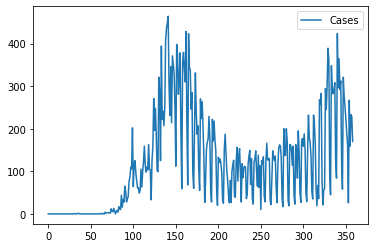

In [3]:
df.plot()
pyplot.show()

In [4]:
df.columns = ['ds', 'y']
df

,ds,y
0,2020-02-13,0
1,2020-02-14,0
2,2020-02-15,0
3,2020-02-16,0
4,2020-02-17,0
...,...,...
354,2021-02-01,267
355,2021-02-02,159
356,2021-02-03,233
357,2021-02-04,228


In [21]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
past = list()
for i in range(5, 13):
    date = '2020-%02d' % i
    for j in range(1, 30):
        day = '%02d' % j
        past.append([date + '-' + day])
for i in range(1, 30):
    past.append(['2021-01-%02d' % i])
past = DataFrame(past)
past.columns = ['ds']
past['ds'] = to_datetime(past['ds'])

            ds        yhat  yhat_lower  yhat_upper
0   2020-05-01   87.451861  -17.174111  190.448125
1   2020-05-02   22.723062  -80.575678  125.400947
2   2020-05-03    0.171162  -98.681297  102.041585
3   2020-05-04  110.359112   -2.835461  206.051892
4   2020-05-05  103.980137   -1.574409  206.167479
..         ...         ...         ...         ...
256 2021-01-25  201.880198   98.764183  302.626234
257 2021-01-26  194.401832   92.859683  297.432238
258 2021-01-27  194.986433   96.118252  298.455649
259 2021-01-28  190.278457   79.962850  296.436543
260 2021-01-29  184.008697   81.131675  291.994151

[261 rows x 4 columns]


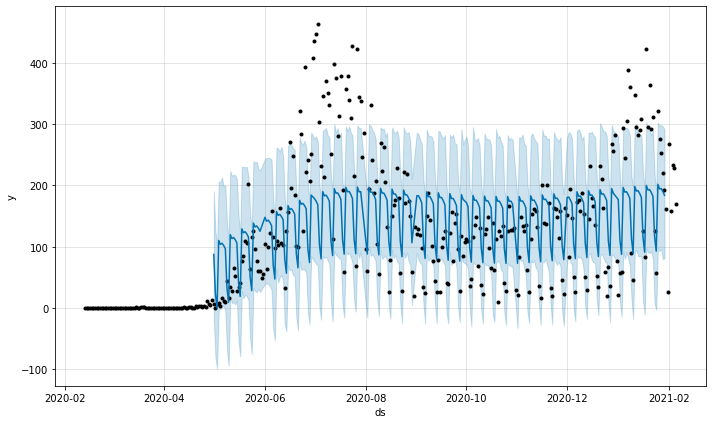

In [37]:
forecast = model.predict(past)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
model.plot(forecast)
pyplot.show()

In [38]:
future = list()
for i in range (1, 29):
    future.append(['2021-02-%02d' % i])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

           ds        yhat  yhat_lower  yhat_upper
0  2021-02-01  203.617774  109.526376  308.629069
1  2021-02-02  196.139408   87.792872  290.890567
2  2021-02-03  196.724009   92.562971  307.595998
3  2021-02-04  192.016033   91.789562  297.544734
4  2021-02-05  185.746273   82.832564  287.323666
5  2021-02-06  119.918083   24.964809  223.437200
6  2021-02-07   96.266792  -11.246470  196.864838
7  2021-02-08  205.355350  103.863640  311.196565
8  2021-02-09  197.876984   94.919649  293.667169
9  2021-02-10  198.461585   94.111346  295.376877
10 2021-02-11  193.753609   96.465245  297.477212
11 2021-02-12  187.483850   83.613055  289.289422
12 2021-02-13  121.655660   20.237760  223.600035
13 2021-02-14   98.004368   -4.746995  201.818363
14 2021-02-15  207.092927  108.184189  310.700760
15 2021-02-16  199.614560   93.043200  300.327584
16 2021-02-17  200.199162   95.406876  301.855379
17 2021-02-18  195.491185   88.733763  295.097960
18 2021-02-19  189.221426   89.010897  287.870717


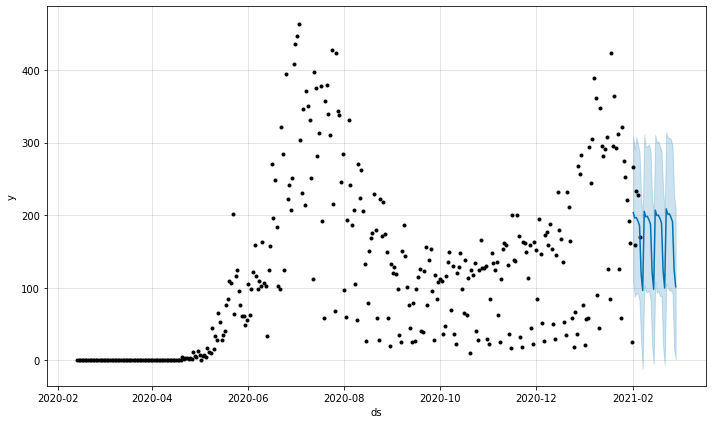

In [39]:
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
model.plot(forecast)
pyplot.show()